# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 9</span>

### <span style="color: #FF5733 "> Esercizio 09.1</span>

L'esercizio chiedeva di risolvere il problema del commesso viaggiatore (TSP) facendo uso di un algoritmo genetico.  
Per farlo, ho implementato la classe *Individuo*. Ogni Individuo all'interno del mio codice rappresenta una particolare realizzazione del percorso tra le città, cioè *Individuo* contiene fra i suoi data-membri privati un vector di interi che contiene le città (rappresentate da numeri), nell'ordine in cui si propone di visitarle. Ciascun individuo è inoltre caratterizzato dal data-membro privato lunghezza, dove salvo la lunghezza quadratica del percorso proposto da quell'individuo.  
Ho creato la popolazione come un vector di Individui e ho inizializzato la prima popolazione con individui estratti a caso.  
È importante che tutti gli indivui all'interno della popolazione rispettino i constrain: devono contenere numeri che rappresentino tutte le città da visitare e non ci devono essere ripetizioni. Nel problema specifico che stiamo risolvendo, i constrain rappresentano il fatto che il commesso viaggiatore debba passare per tutte le città, mai due volte per la stessa e alla fine deve ritrovarsi nel punto da cui è parito (quest'ultimo fatto si ripercuote unicamente sul calcolo della lunghezza quadratica). 
Gli ingredienti fondamentali per l'algoritmo genetetico sono poi la selezione, il crossover e le mutazioni. 

Per scrivere l'algoritmo di **selezione** ho sfruttato il fatto che ad ogni Individuo è associata la lunghezza del percorso, che quantifica la "bontà" dell'individuo: minore è la lunghezza quadratica del percorso proposto, maggiore è la bontà dell'individuo. Quindi maggiore è la quantità  $\frac{1}{lunghezza^2}$ , migliore è l'individuo. Ho diviso il segmento $[0,1)$ in bin non equi: ad ogni individuo presente nella popolazione è associato un bin di larghezza $\frac{N}{lunghezza^2}$, dove N è la costante di normalizzazione. Estraendo poi un numero casuale da una distribuzione uniforme nell'intervallo $[0,1)$, è più probabile che questo cada all'interno di un bin associato a un Individuo che propone un percorso di breve lunghezza, piuttosto che nel bin associato ad un individuo che propone un percorso di maggiore lunghezza (e considero l'individuo estratto quando il numero casuale estratto cade nel bin ad esso corrispondente) 

Il **crossover** funziona invece nel modo seguente: estratti il padre e la madre con l'algoritmo di selezione, estraggo (da una distribuzione uniforme) il punto in cui effettuare il taglio, copio nel primo figlio i geni del padre fino al taglio e nel secondo figlio i geni della madre fino al taglio. A questo punto devo inserire nel primo figlio gli alleli mancanti (le città che non compaiono nei geni precedenti) nell'ordine in cui compaiono nella madre e nel secondo figlio gli alleli mancanti, nell'ordine in cui compaiono nel padre. Avevo quindi la necessità di ricordare gli alleli mancanti e le posizioni in cui questi si trovavano nei genitori e per farlo ho creato la classe *Allele* che ha come data-membri privati due interi: uno indica la città e l'altro la posizione nel genitore di interesse. Ho quindi creato un vector di Alleli dove ho salvato le città mancanti nel primo figlio, associando a ciascuna l'indice con cui questa compare nella madre e un vector di Alleli contenente le città mancanti nel secondo figlio, associate all'indice con cui queste compaiono del padre. Riordinando questi vector in base all'ordine di comparsa nel genitore, ho quindi potuto inserire gli alleli mancanti nei figli nel corretto ordine. Al termine di questo processo si sono quindi sostituiti i due genitori con i due figli (infatti il numero di individui all'interno della popolazione rimane sempre costante). Dal file di input è possibile impostare la probabilità $p∈[0,1]$ con cui avviene in crossover: quando viene chiamato il metodo di Crossover viene estratto un numero distribuito uniformemente tra 0 e 1 e solo se questo è più piccolo di $p$ avviene il crossover, altrimenti i due gnitori vengono semplicemente copiati e inalterati diventano due individui della generazione che si sta costruendo.  

Ho poi implementato alcune **mutazioni** (la cui probabilità può essere impostata dal file di input come per il crossover) che agiscono su un singolo individuo (i metodi di mutazione estraggono in modo uniforme su tutta la popolazione l'individuo su cui agire):  

- lo scambio tra due città  

- lo shift di n posizioni di tutte le città (con n estratto uniformemente tra 0 e il numero totale di città)  

- lo shift di n posizioni di un blocchetto di m città (con il primo estremo del blocchetto estatto nella prima metà del percorso, la lunghezza del blocchetto estratta tra 0 e un terzo del numero totale di città e la posizione di arrivo dell'ultimo elemento del blocchetto estratta tra la posizione immediatamente successiva alla sua posizione di partenza e la fine del percorso)  

- la permutazione fra due blocchetti diversi di città (con il primo estremo del primo blocchetto estratto nella prima metà del percorso, il primo estremo del secondo blocco estratto nella seconda metà del percorso e la lunghezza dei due blocchi estaratta in modo che il primo blocco appartenga alla prima metà del percorso)  

- l'inversione dell'oridine di un blocco di città (dove l'inizio del blocco è estratto in tutto il percorso e la sua lunghezza tra 0 e il numero di città presenti nel percorso).  

Per implementare questi metodi mi sono servita di Periodic Boundary Condition e di alcuni metodi presenti nella standard library (*reverse*, *rotate* e *swap_ranges*).  

**Come è strutturato il mio codice:**  
Vengono allocati i vettori che contengono le coordiante delle città da visitare (da file di input viene letta una vaiabile che discrimina tra le due possibili distribuzioni delle città - cerchio o quadrato). Nel codice sono poi presenti il vector popolazione (e una sua copia, per poter fare in modo corretto l'operazione di crossover) e un Individuo Elitario. La prima generazione viene inizializzata e controllata tramite una funzione di Check, che restituisce 0 se tutti gli individui nella popolazione rispettano i constrain e un valore diverso da zero altrimenti.  
Viene poi eseguito il metodo di Pre_Selezione (che costruisce i bin dis-equi di cui sopra, in base alle lunghezze dei percorsi proposti dagli individui nella popolazione attuale) e quello di Crossover, che rinnova tutta la popolazione, creando la nuova generazione, che verrà poi sottoposta al Check. Vengono poi realizzate le mutazioni, secondo le probabilità lette da file di input. Tutte le volte che si crea una nuova generazione, viene aggiornato l'Elitario, che è un oggetto di tipo Individuo, che contiene l'individuo migliore generato fino a quel momento. Ogni volta che si è rinnovata la popolazione, con probabilità *p_elitario* (letta da file di input) l'individuo peggiore (che propone il percorso più lungo) della popolazione viene sostituito con l'Elitario. Prima di creare la nuova generazione, si scrive sui file di output: il percorso migliore prodotto da quella generazione e la media dei percorsi proposti dalla metà migliore della popolazione.  
Al termine di questo processo (dopo un numero di generazioni uguale a quello impostato da file di input) viene stampato su un file di output il percorso migliore prodotto dall'algoritmo.

Si mostrano di seguito i risultati ottenuti:


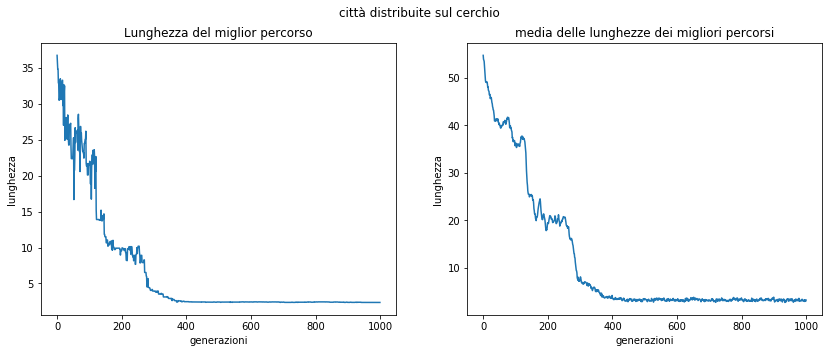

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,5))
plt.suptitle("città distribuite sul cerchio")

plt.subplot(1,2,1)
n, p= np.loadtxt("cerchio/best_path.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.plot(n,p)
plt.xlabel('generazioni')
plt.ylabel('lunghezza')
plt.title('Lunghezza del miglior percorso')

plt.subplot(1,2,2)
n1, p1= np.loadtxt("cerchio/best_mean.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.plot(n1,p1)
plt.xlabel('generazioni')
plt.ylabel('lunghezza')
plt.title('media delle lunghezze dei migliori percorsi')

plt.show()

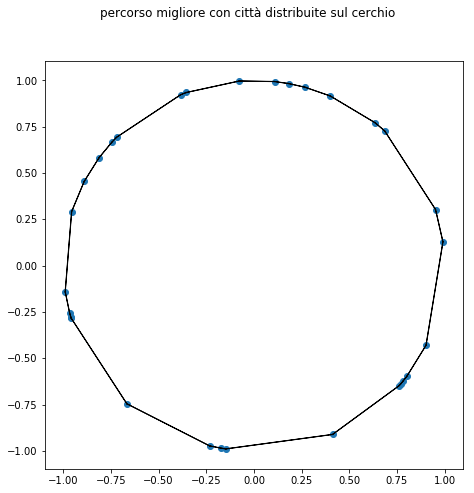

In [3]:
x,y=np.loadtxt("cerchio/percorso_migliore.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.figure(figsize=(7.5,7.5))
plt.suptitle("percorso migliore con città distribuite sul cerchio")
plt.scatter(x,y)
for i in range(0,29):
    plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i])
    
plt.arrow(x[29], y[29], x[0]-x[29], y[0]-y[29])

plt.show()

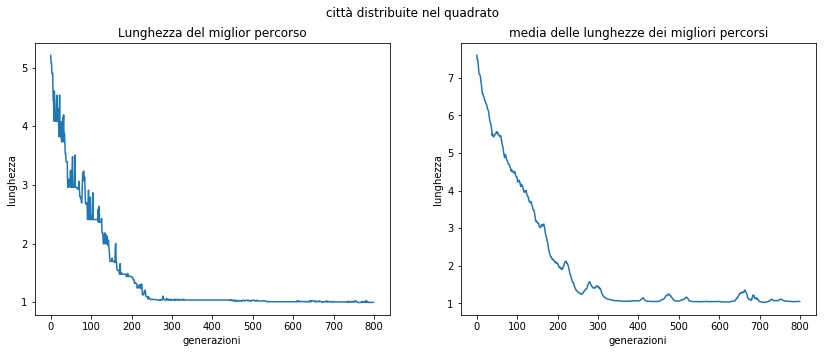

In [10]:
plt.figure(figsize=(14,5))
plt.suptitle("città distribuite nel quadrato")

plt.subplot(1,2,1)
n, p= np.loadtxt("quadrato/best_path.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.plot(n,p)
plt.xlabel('generazioni')
plt.ylabel('lunghezza')
plt.title('Lunghezza del miglior percorso')

plt.subplot(1,2,2)
n1, p1= np.loadtxt("quadrato/best_mean.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.plot(n1,p1)
plt.xlabel('generazioni')
plt.ylabel('lunghezza')
plt.title('media delle lunghezze dei migliori percorsi')

plt.show()

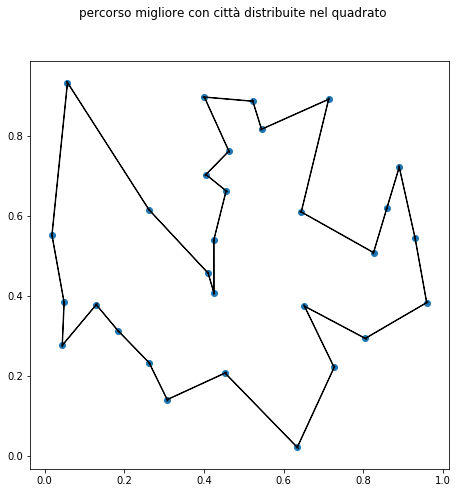

In [9]:
x,y=np.loadtxt("quadrato/percorso_migliore.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.figure(figsize=(7.5,7.5))
plt.suptitle("percorso migliore con città distribuite nel quadrato")
plt.scatter(x,y)
for i in range(0,29):
    plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i])
    
plt.arrow(x[29], y[29], x[0]-x[29], y[0]-y[29])

plt.show()